## Task 1: Low Pass Filters
You are required to implement three functions corresponding to three types of low pass filters. These are:
<ol>
<li> Ideal low pass filter </li>

<li> Butterworth filter </li>

<li> Gaussian filter </li>
</ol>
For each of these filters, we will be considering a parameter, $D_0$, which denotes the cutoff frequency. And in case of the Butterworth filter, we will consider an additional parameter, $n$, which denotes the order.

Complete the three functions given in the following code cells:

In [17]:
import numpy as np
import cv2

In [18]:
def idealLPF(image, D0):
  #Complete the code to implement this function

  #Define the filter H
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.zeros(image.shape)

  H[distance <= D0] = 1





  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)

  return blur_image

In [19]:
def butterworthLPF(image, D0, n):
  #Define the filter H
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.zeros(image.shape)

  H = 1 / (1 + (distance / D0)**(2*n))


  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)

  return blur_image

In [20]:
def gaussianLPF(image, D0):
  #Define the filter H
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.zeros(image.shape)



  H = np.exp(-(distance**2) / (2 * (D0**2)))


  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)

  return blur_image

# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 04.zip. Use your previously implemented functions to show the outputs of the three low pass filters on the sample image. Provide your analysis on the following observations:
<ol>
<li> Explain the reasons for the ringing effect in case of ideal low pass filter. </li>

<li> How can the Butterworth filter be made to have similar effect as the Ideal low pass filter? </li>

<li> How can the Butterworth filter be made to have similar effect as the Gaussian filter? </li>
</ol>

[ WARN:0@420.882] global loadsave.cpp:1063 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


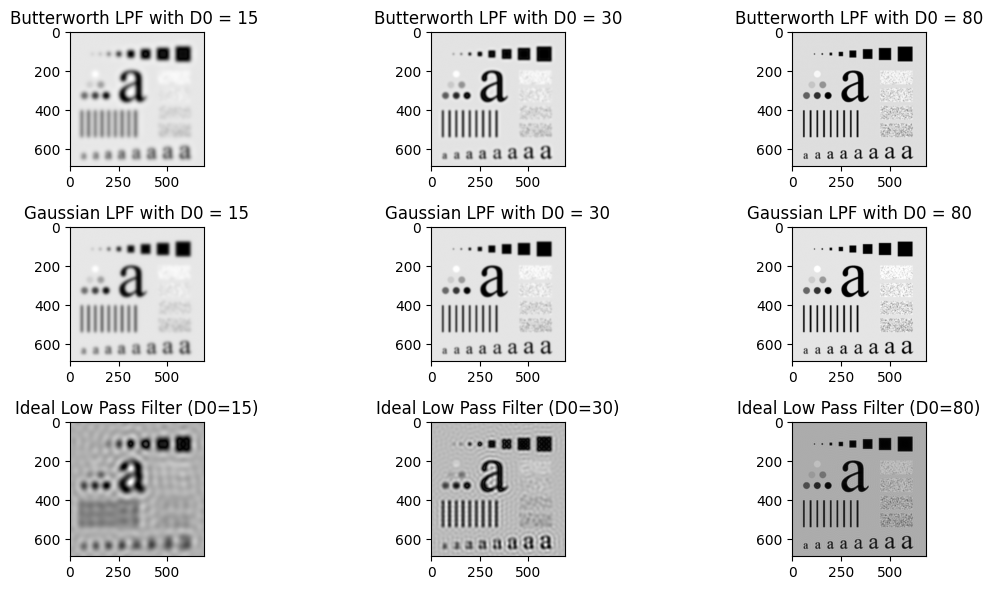

In [26]:
#Generate output for Task 1 here
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
os.makedirs('output_images', exist_ok=True)

# Plot original vs low pass filtered image here


image = cv2.imread("../DIP3E_CH04_Original_Images/DIP3E_Original_Images_CH04/Fig0445(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)
cv2.imwrite('output_images/task1_original.png', image)
idealLPFImage15 = idealLPF(image, 15)
idealLPFImage30 = idealLPF(image, 30)
idealLPFImage80 = idealLPF(image, 80)
butterworthLPFImage15 = butterworthLPF(image, 15, 2)
butterworthLPFImage30 = butterworthLPF(image, 30, 2)
butterworthLPFImage80 = butterworthLPF(image, 80, 2)
gaussianLPFImage80 = gaussianLPF(image, 80)
gaussianLPFImage15 = gaussianLPF(image, 15)
gaussianLPFImage30 = gaussianLPF(image, 30)

# Save individual filtered images
cv2.imwrite('output_images/task1_ideal_lpf_15.png', idealLPFImage15)
cv2.imwrite('output_images/task1_ideal_lpf_30.png', idealLPFImage30)
cv2.imwrite('output_images/task1_ideal_lpf_80.png', idealLPFImage80)
cv2.imwrite('output_images/task1_butterworth_lpf_15.png', butterworthLPFImage15)
cv2.imwrite('output_images/task1_butterworth_lpf_30.png', butterworthLPFImage30)
cv2.imwrite('output_images/task1_butterworth_lpf_80.png', butterworthLPFImage80)
cv2.imwrite('output_images/task1_gaussian_lpf_15.png', gaussianLPFImage15)
cv2.imwrite('output_images/task1_gaussian_lpf_30.png', gaussianLPFImage30)
cv2.imwrite('output_images/task1_gaussian_lpf_80.png', gaussianLPFImage80)

fig, axes = plt.subplots(3, 3, figsize=(12, 6))


axes[0][0].imshow(butterworthLPFImage15, cmap='gray')
axes[0][0].set_title('Butterworth LPF with D0 = 15 ')

axes[0][1].imshow(butterworthLPFImage30, cmap='gray')
axes[0][1].set_title('Butterworth LPF with D0 = 30')

axes[0][2].imshow(butterworthLPFImage80, cmap='gray')
axes[0][2].set_title('Butterworth LPF with D0 = 80')


axes[2][0].imshow(idealLPFImage15, cmap='gray')
axes[2][0].set_title('Ideal Low Pass Filter (D0=15)')

axes[2][1].imshow(idealLPFImage30, cmap='gray')
axes[2][1].set_title('Ideal Low Pass Filter (D0=30)')

axes[2][2].imshow(idealLPFImage80, cmap='gray')
axes[2][2].set_title('Ideal Low Pass Filter (D0=80)')


axes[1][1].imshow(gaussianLPFImage30, cmap='gray')
axes[1][1].set_title('Gaussian LPF with D0 = 30')

axes[1][2].imshow(gaussianLPFImage80, cmap='gray')
axes[1][2].set_title('Gaussian LPF with D0 = 80')

axes[1][0].imshow(gaussianLPFImage15, cmap='gray')
axes[1][0].set_title('Gaussian LPF with D0 = 15')


plt.tight_layout()
plt.savefig('output_images/task1_lpf_comparison.png')
plt.show()

## Analysis:
1. **Why ringing in ideal LPF:** The ideal low pass filter has an abrupt cutoff in the frequency domain, creating a discontinuity that violates the smoothness required for inverse Fourier transform. This leads to the Gibbs phenomenon, where high-frequency oscillations (ringing) appear in the spatial domain as artifacts around sharp edges, because the filter cannot perfectly separate frequencies without introducing these ripples.

2. **How to make Butterworth similar to ideal:** Increase the filter order $n$. Higher $n$ narrows the transition band, making the frequency response steeper and closer to the ideal's sharp cutoff. For example, $n=10$ provides a much sharper transition than $n=2$, approximating the ideal behavior by reducing the gradual roll-off, though it never eliminates the slight smoothness inherent to Butterworth filters.

3. **How to make Butterworth similar to Gaussian:** Use a low order $n$, such as 1 or 2. This widens the transition band, creating a gradual attenuation similar to the Gaussian's exponential decay. The Butterworth then behaves like a smooth low pass filter, avoiding sharp cutoffs that cause ringing, and matching the Gaussian's natural blurring effect through its polynomial-based roll-off.

# Task 2
For this task, you are required to write three functions  that will each convert the low pass filters implemented in Task 1 into their corresponding high pass versions.

In [22]:
def idealHPF(image, D0):
  #Define the filter H
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.ones(image.shape)

  H[distance <= D0] = 0



  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)

  return blur_image

In [23]:
def butterworthHPF(image, D0, n):
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.ones(image.shape)

  epsilon = 1e-5

  # Now the center pixel (distance=0) becomes (distance=0.00001)
  # The formula becomes 1 / (1 + HugeNumber), which correctly results in 0.
  H = 1 / (1 + (D0 / (distance + epsilon))**(2*n))




  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)
  return blur_image

In [24]:
def gaussianHPF(image, D0):
  rows, cols = image.shape

  # Find the center coordinates
  crow, ccol = rows // 2, cols // 2


  u = np.arange(rows)
  v = np.arange(cols)
  U, V = np.meshgrid(u, v, indexing='ij')

  distance = np.sqrt((U - crow)**2 + (V - ccol)**2)

  # Initialize H with zeros
  H = np.ones(image.shape)

  H = np.exp(-(distance**2) / (2 * (D0**2)))





  #Apply the filter

  ## Utilize the following code segment
  # Apply the 2D DFT and then shift the transformed domain.
  fshift = np.fft.fftshift(np.fft.fft2(image))

  # Apply the filter in the frequency domain
  fshift_filtered = fshift * H

  # Shift (inverse) the transformed domain and apply the 2D Inverse DFT.
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))

  # Take the magnitude of the complex values.
  blur_image = np.abs(img_filtered)

  return blur_image

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the three high pass filtering techniques on an appropriate image.

Provide your analysis on the following topic:
<ol>
<li> Do we see the similar effect in ideal HPF as we did in case of ideal LPF? If so, then why? </li>

<li> How does filter cutoff frequency affect the extraction of edges in case of HPF? </li>
</ol>

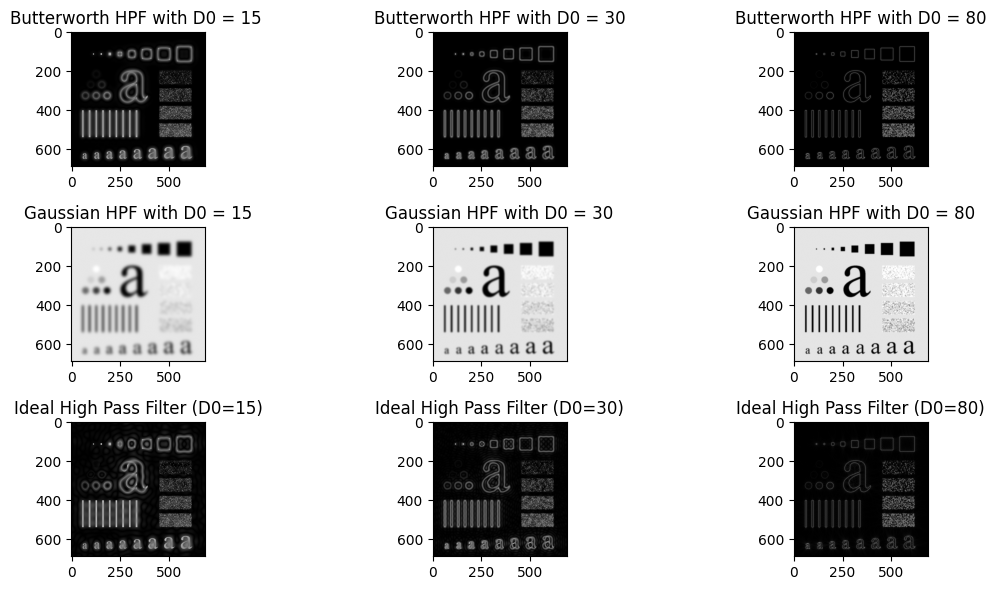

In [27]:
#Generate output for Task 2 here
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
os.makedirs('output_images', exist_ok=True)

# Plot original vs low pass filtered image here


image = cv2.imread("../DIP3E_CH04_Original_Images/DIP3E_Original_Images_CH04/Fig0445(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)
idealHPFImage15 = idealHPF(image, 15)
idealHPFImage30 = idealHPF(image, 30)
idealHPFImage80 = idealHPF(image, 80)
butterworthHPFImage15 = butterworthHPF(image, 15, 2)
butterworthHPFImage30 = butterworthHPF(image, 30, 2)
butterworthHPFImage80 = butterworthHPF(image, 80, 2)
gaussianHPFImage80 = gaussianHPF(image, 80)
gaussianHPFImage15 = gaussianHPF(image, 15)
gaussianHPFImage30 = gaussianHPF(image, 30)

# Save individual filtered images
cv2.imwrite('output_images/task2_ideal_hpf_15.png', idealHPFImage15)
cv2.imwrite('output_images/task2_ideal_hpf_30.png', idealHPFImage30)
cv2.imwrite('output_images/task2_ideal_hpf_80.png', idealHPFImage80)
cv2.imwrite('output_images/task2_butterworth_hpf_15.png', butterworthHPFImage15)
cv2.imwrite('output_images/task2_butterworth_hpf_30.png', butterworthHPFImage30)
cv2.imwrite('output_images/task2_butterworth_hpf_80.png', butterworthHPFImage80)
cv2.imwrite('output_images/task2_gaussian_hpf_15.png', gaussianHPFImage15)
cv2.imwrite('output_images/task2_gaussian_hpf_30.png', gaussianHPFImage30)
cv2.imwrite('output_images/task2_gaussian_hpf_80.png', gaussianHPFImage80)

fig, axes = plt.subplots(3, 3, figsize=(12, 6))


axes[0][0].imshow(butterworthHPFImage15, cmap='gray')
axes[0][0].set_title('Butterworth HPF with D0 = 15 ')

axes[0][1].imshow(butterworthHPFImage30, cmap='gray')
axes[0][1].set_title('Butterworth HPF with D0 = 30')

axes[0][2].imshow(butterworthHPFImage80, cmap='gray')
axes[0][2].set_title('Butterworth HPF with D0 = 80')


axes[2][0].imshow(idealHPFImage15, cmap='gray')
axes[2][0].set_title('Ideal High Pass Filter (D0=15)')

axes[2][1].imshow(idealHPFImage30, cmap='gray')
axes[2][1].set_title('Ideal High Pass Filter (D0=30)')

axes[2][2].imshow(idealHPFImage80, cmap='gray')
axes[2][2].set_title('Ideal High Pass Filter (D0=80)')


axes[1][1].imshow(gaussianHPFImage30, cmap='gray')
axes[1][1].set_title('Gaussian HPF with D0 = 30')

axes[1][2].imshow(gaussianHPFImage80, cmap='gray')
axes[1][2].set_title('Gaussian HPF with D0 = 80')

axes[1][0].imshow(gaussianHPFImage15, cmap='gray')
axes[1][0].set_title('Gaussian HPF with D0 = 15')


plt.tight_layout()
plt.savefig('output_images/task2_hpf_comparison.png')
plt.show()

## Analysis:
1. **Why ringing in ideal HPF:** Yes, ringing occurs because the ideal HPF is created by subtracting the ideal LPF from the original image. The sharp cutoff in the LPF introduces discontinuities in the frequency domain, leading to Gibbs oscillations that propagate to the HPF. These artifacts manifest as halos or ripples around edges, amplifying the original LPF's ringing due to the subtraction process.

2. **How cutoff frequency affects edge extraction:** The cutoff $D_0$ determines which frequencies are preserved or attenuated. A lower $D_0$ allows more low-to-mid frequencies through the HPF, resulting in subtle edge enhancement that highlights broader structures. A higher $D_0$ blocks more low frequencies, emphasizing fine details and sharp edges by amplifying high-frequency components, but it also boosts noise, making edges appear more defined yet potentially unstable.